# Predicting Compressive Strength of Concrete

In [1]:
from pyforest import*
lazy_imports()

['from sklearn.preprocessing import OneHotEncoder',
 'import sklearn',
 'import os',
 'import lightgbm as lgb',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import datetime as dt',
 'import plotly as py',
 'import awswrangler as wr',
 'import re',
 'import pandas as pd',
 'import matplotlib as mpl',
 'import pydot',
 'from pathlib import Path',
 'import altair as alt',
 'from sklearn import svm',
 'from dask import dataframe as dd',
 'import glob',
 'import seaborn as sns',
 'import spacy',
 'import pickle',
 'import bokeh',
 'import xgboost as xgb',
 'from sklearn.ensemble import RandomForestRegressor',
 'import nltk',
 'from pyspark import SparkContext',
 'from sklearn.manifold import TSNE',
 'from sklearn.ensemble import RandomForestClassifier',
 'import sys',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import tqdm',
 'import keras',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from openpyxl import load_workbook',
 'import dash'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("compresive_strength_concrete-2.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [7]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"Cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"Slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"Ash",
       'Water  (component 4)(kg in a m^3 mixture)':"Water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplastic",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse Agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"Fine Agg", 'Age (day)':"Age",
       'Concrete compressive strength(MPa, megapascals) ':"Strength"})

In [8]:
df

,Cement,Slag,Ash,Water,Superplastic,Coarse Agg,Fine Agg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
df.isnull().sum()

Cement          0
Slag            0
Ash             0
Water           0
Superplastic    0
Coarse Agg      0
Fine Agg        0
Age             0
Strength        0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Agg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Agg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
# We can see that cement, slag, ash are left skewed

# Exploratory Data Analysis

Cement

In [12]:
# Quartiles
from scipy import stats

Q1 = df['Cement'].quantile(q=0.25)
Q3 = df['Cement'].quantile(q=0.75)
print('1st Quantile (Q1) is: ', Q1)
print('3rd Quantile (Q1) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['Cement']))

1st Quantile (Q1) is:  192.375
3rd Quantile (Q1) is:  350.0
Interquartile range (IQR) is  157.625


In [13]:
# Outlier detection from Interquartile range (IQR) in original

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement: ',L_outliers)
print('Upper outliers limit in cement: ',U_outliers)


Lower outliers limit in cement:  -44.0625
Upper outliers limit in cement:  586.4375


In [14]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in cement upper: ',df[df['Cement']>586.4375]['Cement'].count())
print('Number of outliers in cement lower: ',df[df['Cement']<-44.0625]['Cement'].count())
print('% of Outlier in cement upper: ',round(df[df['Cement']>586.4375]['Cement'].count()*100/len(df)))
print('% of Outlier in cement upper: ',round(df[df['Cement']<-44.0625]['Cement'].count()*100/len(df)))

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0
% of Outlier in cement upper:  0.0
% of Outlier in cement upper:  0.0


<IPython.core.display.Javascript object>

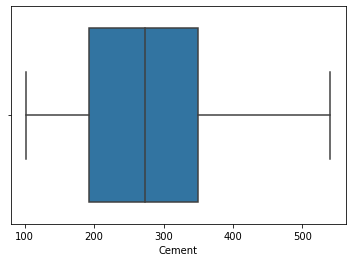

In [15]:
# Distribution of Cement

sns.boxplot(x='Cement',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ash')

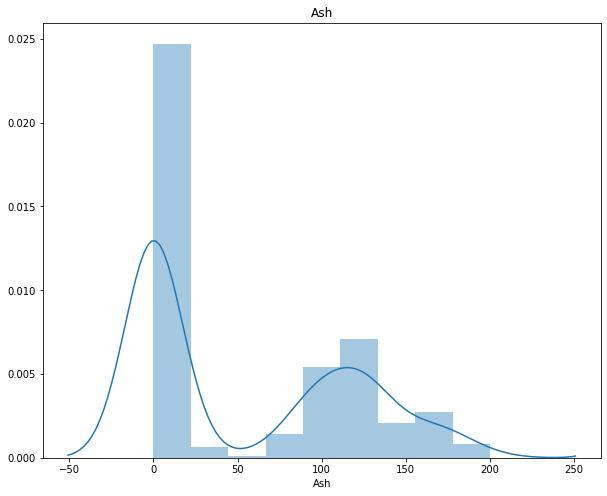

In [16]:
#distplot

plt.figure(figsize=(10,8))
sns.distplot(df['Ash']).set_title("Ash")

# Water

From the describe function above:

Minimum water: 121.8

Maximum water: 247.0

Mean value: 181.56728155339803

Median value: 185.0

Standard deviation: 21.354218565032525

Null values: 0


In [17]:
#Quartiles

w_Q1=df['Water'].quantile(q=0.25)
w_Q3=df['Water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['Water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [18]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print('Lower outliers in water: ', WL_outliers)
print('Upper outliers in water: ', WU_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [19]:
#Checking for presence of outliers with the upper and lower limits


print('Number of outliers in water upper : ', df[df['Water']>232.65]['Water'].count())
print('Number of outliers in water lower : ', df[df['Water']<124.25]['Water'].count())


# print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
# print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5


<IPython.core.display.Javascript object>

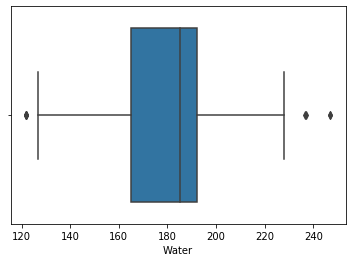

In [20]:
#Distribution of WATER

sns.boxplot(x='Water',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Water')

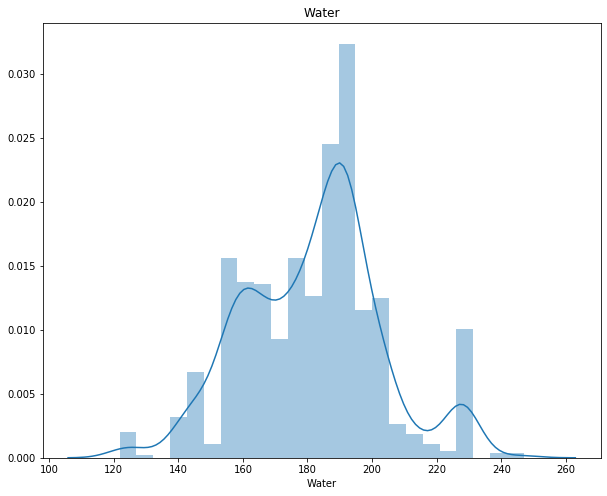

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df['Water']).set_title("Water")

# Slag

1st Quartile (Q1) is: 0.0

3st Quartile (Q3) is: 142.95

Interquartile range (IQR) is 142.95


In [22]:
Q1=df['Slag'].quantile(q=0.25)
Q3=df['Slag'].quantile(q=0.75)

In [23]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Slag: ', L_outliers)
print('Upper outliers in Slag: ', U_outliers)

Lower outliers in Slag:  -214.42499999999998
Upper outliers in Slag:  357.375


In [24]:
print('Number of outliers in slag upper : ', df[df['Slag']>357.375]['Slag'].count())
print('Number of outliers in slag lower : ', df[df['Slag']<-214.425]['Slag'].count())



print('% of Outlier in slag upper: ',round(df[df['Slag']>357.375]['Slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['Slag']<-214.425]['Slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


<IPython.core.display.Javascript object>

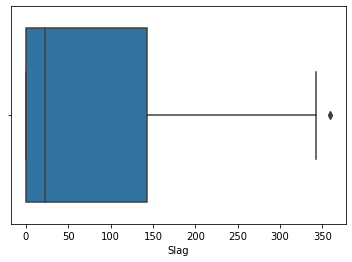

In [25]:
#Distribution of SLAG

sns.boxplot(x='Slag',data=df,orient='h')

# Age

Minimum age: 1

Maximum age: 365

Mean value: 45.662135922330094

Median value: 28.0

Standard deviation: 63.169911581033155

Null values: False

In [26]:
Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)

In [27]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  -66.5
Upper outliers in Age:  129.5


In [28]:
print('Number of outliers in age upper : ', df[df['Age']> 129.5]['Age'].count())
print('Number of outliers in age lower : ', df[df['Age']< -66.5]['Age'].count())

print('% of Outlier in slag upper: ',round(df[df['Age']>357.375]['Age'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['Age']<-214.425]['Age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in slag upper:  2.0 %
% of Outlier in slag lower:  0.0 %


<IPython.core.display.Javascript object>

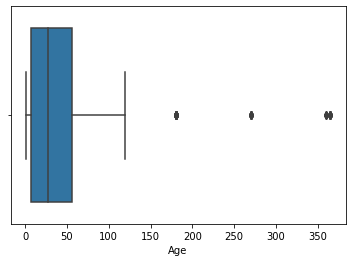

In [29]:
#Distribution of AGE

sns.boxplot(x='Age',data=df,orient='h')

# Ash

Minimum ash: 0.0

Maximum ash: 200.1

Mean value: 54.18834951456309

Median value: 0.0

Standard deviation: 63.99700415268812

In [30]:
Q1=df['Ash'].quantile(q=0.25)
Q3=df['Ash'].quantile(q=0.75)

In [31]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [32]:
print('Number of outliers in ash upper : ', df[df['Ash']>295.75]['Ash'].count())
print('Number of outliers in ash lower : ', df[df['Ash']<-177.45]['Ash'].count())

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0


<IPython.core.display.Javascript object>

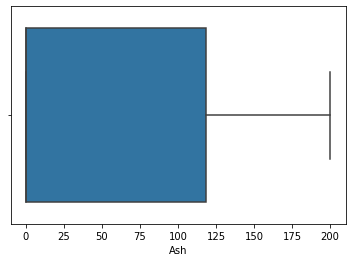

In [33]:
#Distribution of ASH

sns.boxplot(x='Ash',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

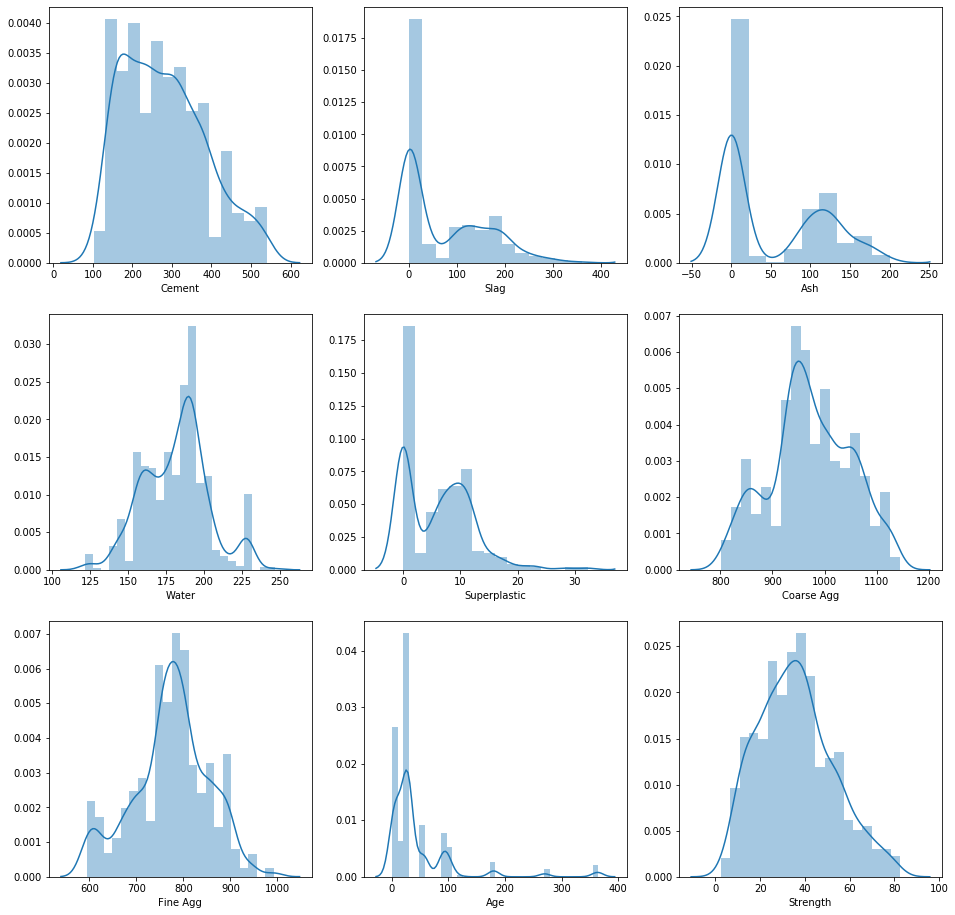

In [34]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['Cement'],ax=ax2[0][0])
sns.distplot(df['Slag'],ax=ax2[0][1])
sns.distplot(df['Ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['Superplastic'],ax=ax2[1][1])
sns.distplot(df['Coarse Agg'],ax=ax2[1][2])
sns.distplot(df['Fine Agg'],ax=ax2[2][0])
sns.distplot(df['Age'],ax=ax2[2][1])
sns.distplot(df['Strength'],ax=ax2[2][2])

# Observation

# We can see observe that :

cement is almost normal.

slag has three gausssians and rightly skewed.

ash has two gaussians and rightly skewed.

water has three guassians and slighly left skewed.

superplastic has two gaussians and rightly skewed.

coarseagg has three guassians and almost normal.

fineagg has almost two guassians and looks like normal.

age has multiple guassians and rightly skewed.


<IPython.core.display.Javascript object>

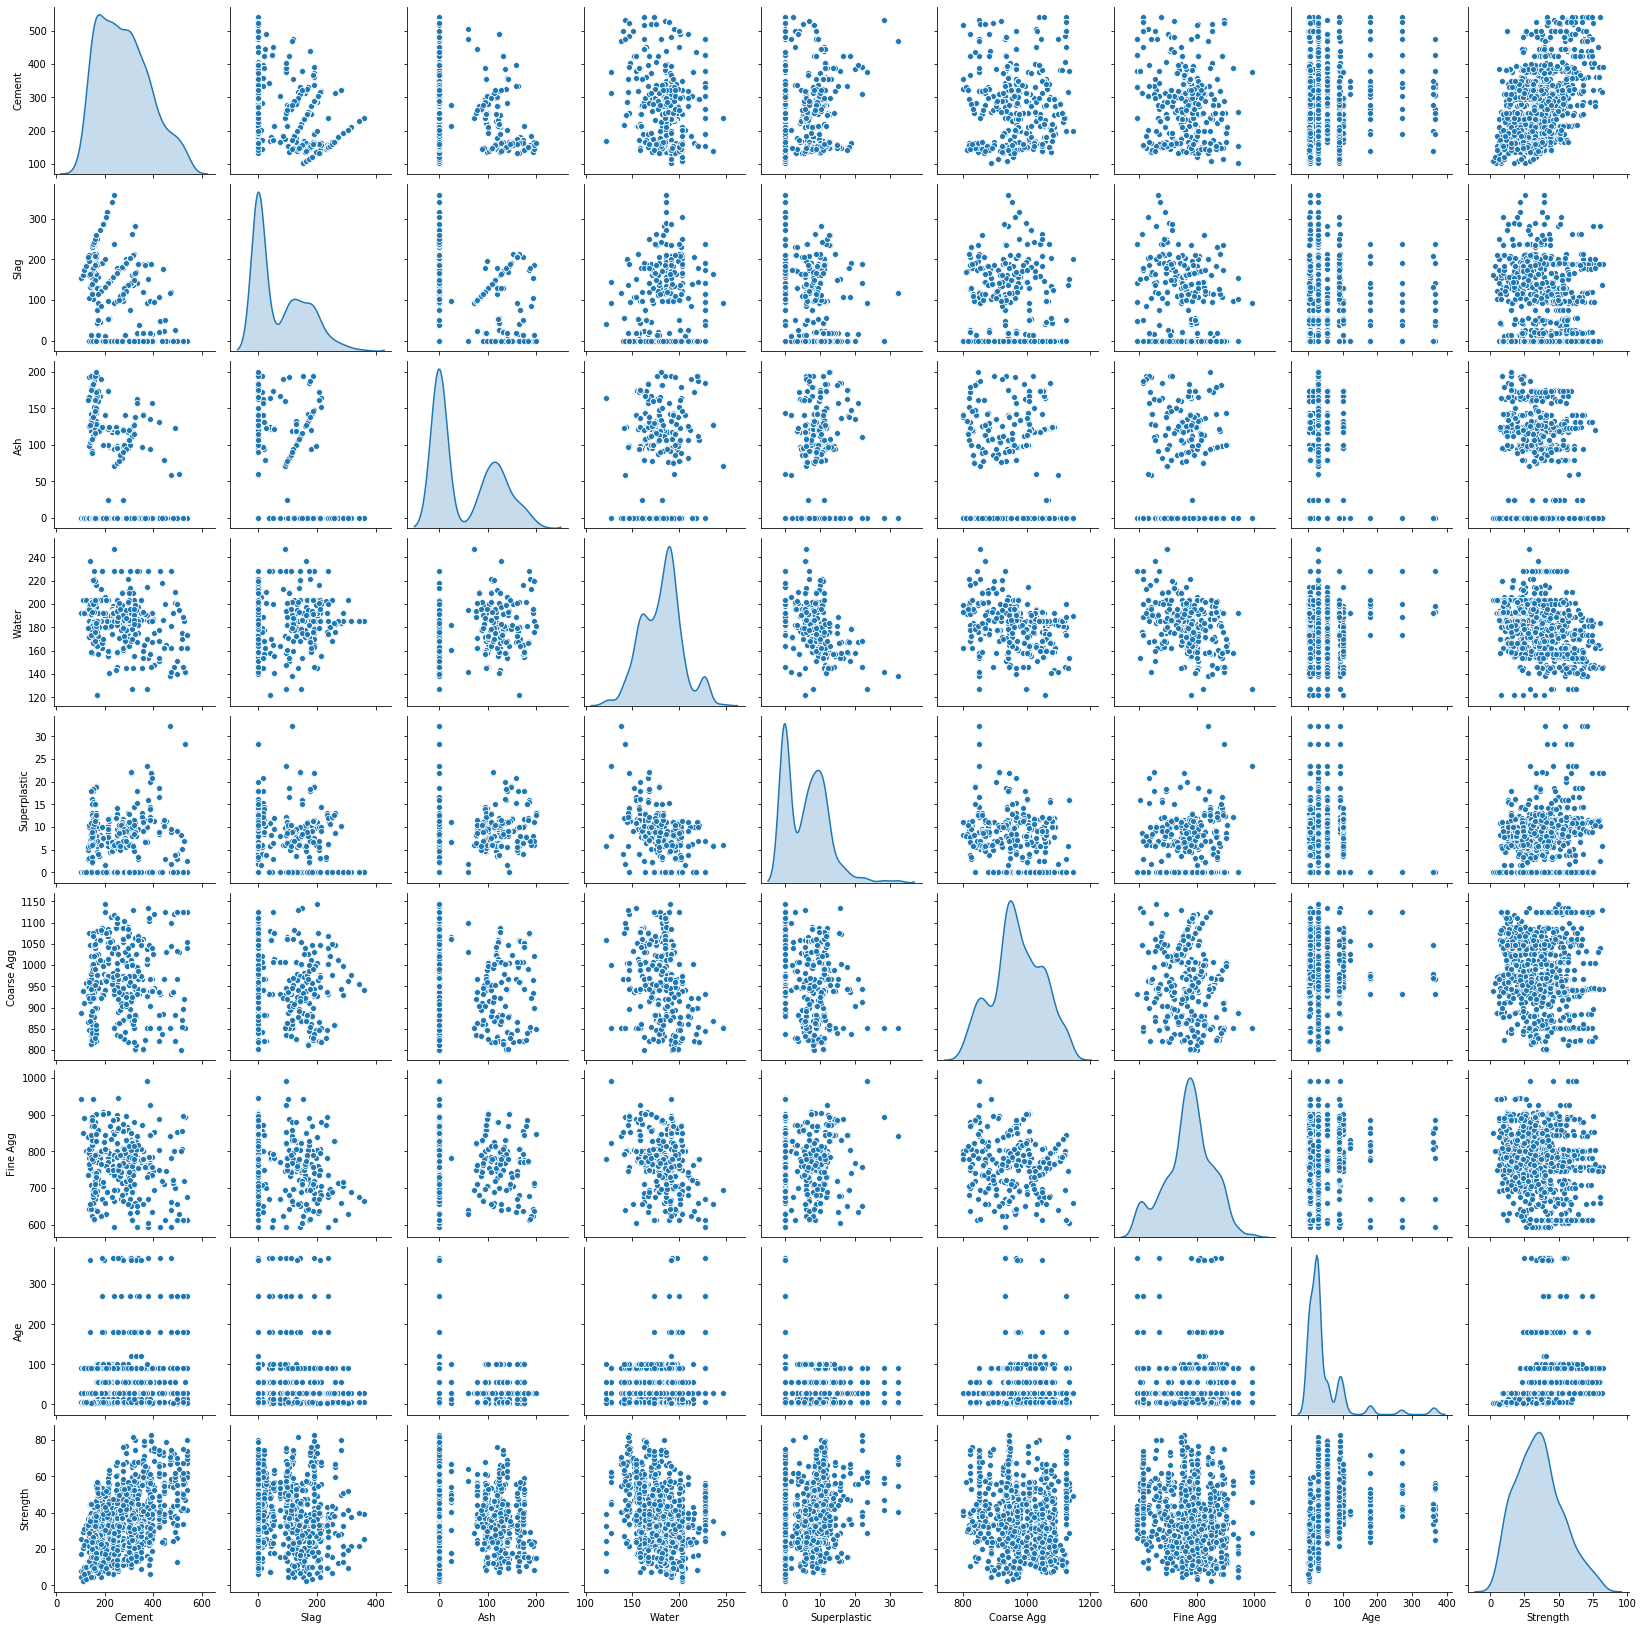

In [35]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(df, diag_kind='kde')

# Correlation between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

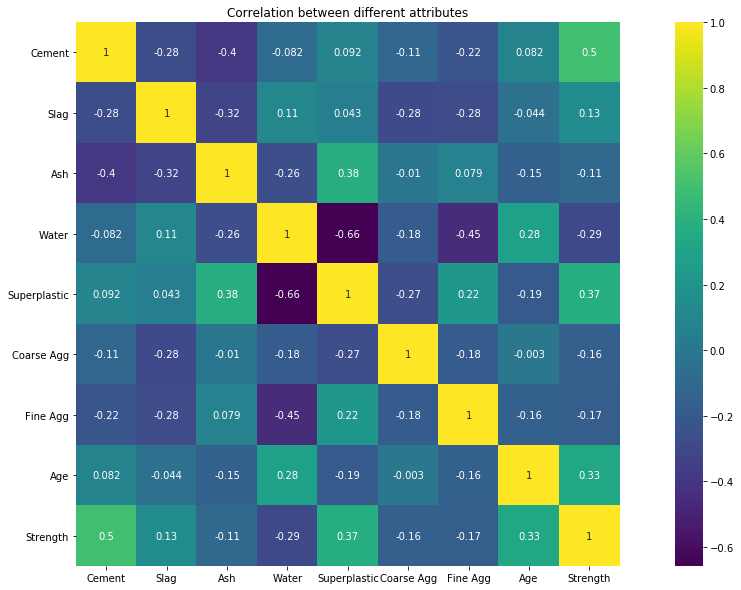

In [36]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

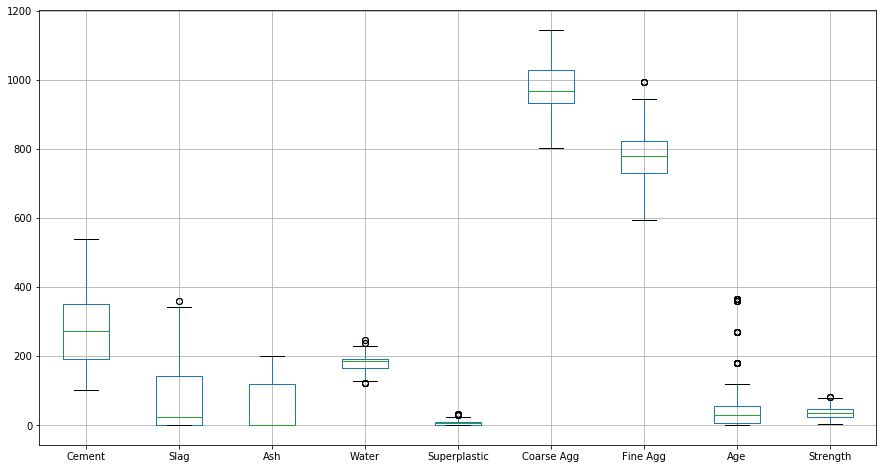

In [37]:
df.boxplot(figsize=(15,8))

In [38]:
print('Outliers in cement: ',df[((df.Cement - df.Cement.mean()) / df.Cement.std()).abs() >3]['Cement'].count())
print('Outliers in slag: ',df[((df.Slag - df.Slag.mean()) / df.Slag.std()).abs() >3]['Slag'].count())
print('Outliers in ash: ',df[((df.Ash - df.Ash.mean()) /df.Ash.std()).abs() >3]['Ash'].count())
print('Outliers in water: ',df[((df.Water - df.Water.mean()) / df.Water.std()).abs() >3]['Water'].count())
print('Outliers in superplastic: ',df[((df.Superplastic -df.Superplastic.mean()) /df.Superplastic.std()).abs() >3]['Superplastic'].count())
print('Outliers in coarseagg: ',df[((df['Coarse Agg'] - df['Coarse Agg'].mean()) /df['Coarse Agg'].std()).abs() >3]['Coarse Agg'].count())
print('Outliers in fineagg: ',df[((df['Fine Agg'] - df['Fine Agg'].mean()) /df['Fine Agg'].std()).abs() >3]['Fine Agg'].count())
print('Outliers in age: ',df[((df.Age -df.Age.mean()) /df.Age.std()).abs() >3]['Age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


# Replacing the outliers by median

In [39]:
for cols in df.columns[:-1]:    
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3 - Q1
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

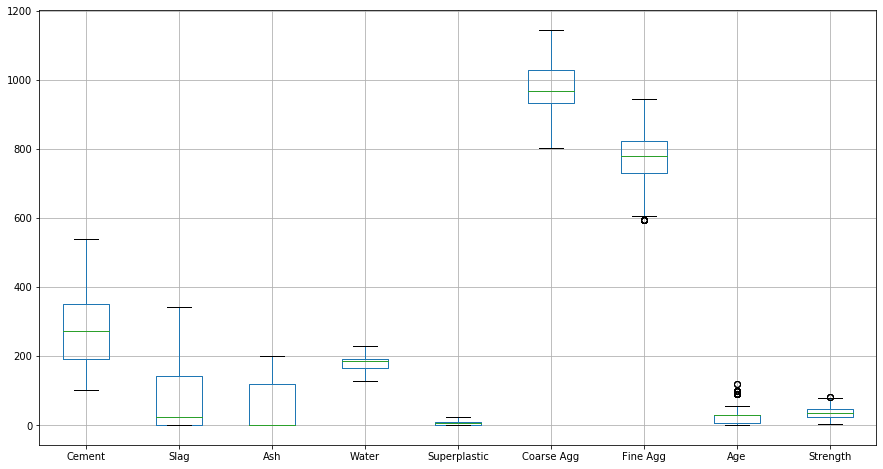

In [40]:
df.boxplot(figsize=(15,8))

# Feature Engineering and Model Building

In [41]:
df.head()

,Cement,Slag,Ash,Water,Superplastic,Coarse Agg,Fine Agg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [42]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X=df.drop('Strength',axis=1)
y =df['Strength']

In [43]:
from scipy.stats import zscore

Xscaled =X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size = 0.35, random_state = 1)

<IPython.core.display.Javascript object>

# Building Different Models


# Random Forest

In [45]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = model.predict(X_test)

In [47]:
#Model Performance on Training Data

model.score(X_train,y_train)

0.9820597193965305

In [48]:
#Model Performance on Testing Data

model.score(X_test,y_test)

0.877035793160382

In [49]:
from sklearn import metrics
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.8770357931603822

In [50]:
metrics.mean_squared_error(y_test, y_pred)

32.46949216871067

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036


# KFold cross validation

In [52]:
from sklearn.model_selection import KFold, cross_val_score


In [53]:
k = 20

kfold = KFold(n_splits=k) #you can ignore the random state
K_results = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

0.7644471781442478

In [54]:
gradient_k = pd.DataFrame({'Algorithm':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447


# Ada Boosting Regressor

In [55]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)

In [56]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [57]:
y_pred = model.predict(X_test)

In [58]:
model.score(X_train,y_train)

0.8191750739607626

In [59]:
aa_Ada=metrics.r2_score(y_test, y_pred)
aa_Ada

0.756522616139082

In [60]:
model.score(X_test,y_test)

0.756522616139082

In [61]:
metrics.mean_squared_error(y_test, y_pred)

64.2917741000964

In [62]:
acc_Ada = pd.DataFrame({'Algorithm':['Ada Boosting Regressor'], 'accuracy': [aa_Ada]},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523


# K Fold Cross Validation

In [63]:
k = 20

kfold = KFold(n_splits=k, random_state=70)
results_4 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

0.5730465350473312

In [64]:
acc_AdaC = pd.DataFrame({'Algorithm':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047


# KNN Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
#Checking for different values of neighbors to determine the best number of neighbors


diff_k=[]
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean error')

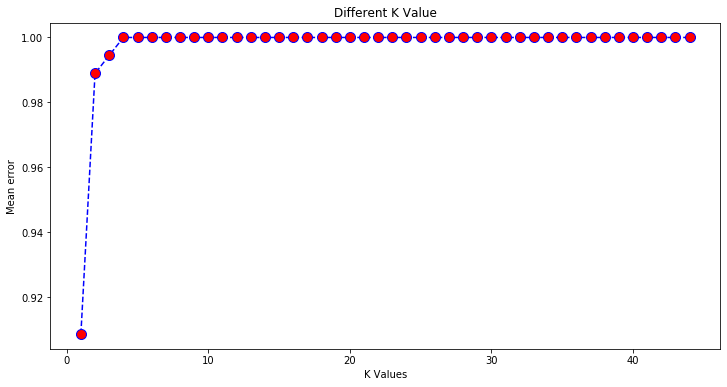

In [67]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Value')
plt.xlabel('K Values')
plt.ylabel('Mean error')

In [68]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [69]:
y_pred = model.predict(X_test)

In [70]:
model.score(X_train,y_train)

0.9078694747619924

In [71]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN


0.7534952132014786

In [72]:
metrics.mean_squared_error(y_test, y_pred)

65.09117937827023

In [73]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]},index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495


In [74]:
# KFold Validation

In [75]:
k= 20
kfold = KFold(n_splits=k, random_state=70)
results_5= cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

0.6907106255855276

In [76]:
KNNKfold_df = pd.DataFrame({'Algorithm':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, KNNKfold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711


# Bagging Regressor

In [77]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [78]:
y_pred = model.predict(X_test)

In [79]:
model.score(X_train,y_train)

0.9758477188029658

In [80]:
model.score(X_test,y_test)

0.8585301912525276

In [81]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

0.8585301912525276

In [82]:
metrics.mean_squared_error(y_test, y_pred)

37.35601574876411

In [83]:
Bagging_df = pd.DataFrame({'Algorithm':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'9'})
results = pd.concat([results, Bagging_df ])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530


# KFold Cross Validation

In [84]:
k= 20

kfold = KFold(n_splits=k, random_state=70)
results_6 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_6 ))
accuracy

<IPython.core.display.Javascript object>

0.7385783839594956

In [85]:
BaggingKFold_df = pd.DataFrame({'Algorithm':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results,BaggingKFold_df ])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578


In [86]:
# Support Vector Regressor

In [87]:
from sklearn.svm import SVR

In [88]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
y_pred = model.predict(X_test)

In [90]:
model.score(X_train,y_train)

0.7351159820474905

In [91]:
model.score(X_test,y_test)

0.6558025044632174

In [92]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

0.6558025044632174

In [93]:
metrics.mean_squared_error(y_test, y_pred)

90.8875694241507

In [94]:
SVR_df = pd.DataFrame({'Algorithm':['Support Vector Regressor'], 'accuracy': [acc_SVR]},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803


In [95]:
# KFold Cross Validation SVR

In [96]:
k= 10

kfold = KFold(n_splits=k, random_state=70)
results_6 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_6))
accuracy

<IPython.core.display.Javascript object>

0.6685376577727407

In [97]:
SVRKFold_df = pd.DataFrame({'Algorithm':['SVR k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, SVRKFold_df ])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803
12,SVR k fold,0.668538


# XGBoost Regressor

In [98]:
import xgboost as xgb

In [99]:
from xgboost.sklearn import XGBRegressor

xgr =XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
y_pred = xgr.predict(X_test)

In [101]:
xgr.score(X_train,y_train)

0.993270907648791

In [102]:
xgr.score(X_test,y_test)

0.8967920093334113

In [103]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

0.8967920093334112

In [104]:
metrics.mean_squared_error(y_test, y_pred)

27.252735823100334

In [105]:
XGB_df = pd.DataFrame({'Algorithm':['XGBoast'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results,XGB_df  ])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803
12,SVR k fold,0.668538


# Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [108]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importances: 
               Importance
Cement          0.296882
Slag            0.059412
Ash             0.013717
Water           0.131071
Superplastic    0.050580
Coarse Agg      0.030682
Fine Agg        0.054523
Age             0.363133




As we can see, cement, age and water are the most important features.

On the other hand, Ash, coarse agg, fine agg, superplastic and slag are the less important features and will have less impact on the strength


In [109]:
y_pred = dec_model.predict(X_test)

In [110]:
dec_model.score(X_train,y_train)

0.9936400304825556

In [111]:
dec_model.score(X_test,y_test)

0.7444108885097009

In [112]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

0.7444108885097009

In [113]:
metrics.mean_squared_error(y_test, y_pred)

67.48995392428439

In [114]:
XGB_df = pd.DataFrame({'Algorithm':['Decision Tree'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results,XGB_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803
12,SVR k fold,0.668538


In [115]:
k = 18

kfold = KFold(n_splits=k, random_state=70)
results_7= cross_val_score(dec_model,X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

0.6400999630895399

In [116]:
DecKFold_df = pd.DataFrame({'Algorithm':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'15'})
results = pd.concat([results, DecKFold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803
12,SVR k fold,0.668538


In [117]:
df2=df.copy() #create a copy of df in order to drop least important features and work on it while not messing up our original data

In [118]:
X = df2.drop( ['Strength','Ash','Coarse Agg','Fine Agg'] , axis=1)
y = df2['Strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

<IPython.core.display.Javascript object>

In [119]:
X_train =X_train.apply(zscore)

In [120]:
X_test =X_test.apply(zscore)

In [121]:
decNew_model = DecisionTreeRegressor()
decNew_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [122]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(decNew_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importances: 
               Importance
Cement          0.351129
Slag            0.073949
Water           0.140971
Superplastic    0.057052
Age             0.376899


In [123]:
y_pred = decNew_model.predict(X_test)

In [124]:
decNew_model.score(X_train,y_train)

0.9911889880235538

In [125]:
decNew_model.score(X_test,y_test)

0.7372234139248451

In [126]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

0.7372234139248451

In [127]:
Dec_df1 = pd.DataFrame({'Algorithm':['Decision Tree2'], 'accuracy': [acc_DT]},index={'16'})
results = pd.concat([results, Dec_df1 ])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877036
4,Gradient Boost Regressor k fold,0.764447
5,Ada Boosting Regressor,0.756523
6,Ada Boosting Regressor k fold,0.573047
7,KNN Regressor,0.753495
8,KNN Regressor k fold,0.690711
9,Bagging Regressor,0.858530
10,Bagging Regressor k fold,0.738578
11,Support Vector Regressor,0.655803
12,SVR k fold,0.668538


In [128]:
#Let's create our training and testint data again since it has been overriden

X=df.drop('Strength',axis=1)
y =df['Strength']

In [129]:
Xscaled =X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [130]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size = 0.3, random_state = 1)

<IPython.core.display.Javascript object>

In [131]:
dec_prun_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [132]:
print (pd.DataFrame(dec_prun_model.feature_importances_, columns = ["Importance"], index = X_train.columns))

<IPython.core.display.Javascript object>

              Importance
Cement          0.355615
Slag            0.000000
Ash             0.000000
Water           0.106034
Superplastic    0.035409
Coarse Agg      0.000000
Fine Agg        0.025055
Age             0.477887


In [133]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot

In [134]:
Xscaled_df=Xscaled_df.drop('Strength',axis=1)
feature_cols = Xscaled_df.columns

In [135]:
feature_cols

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarse Agg',
       'Fine Agg', 'Age'],
      dtype='object')

In [138]:
dot_data = StringIO()  
export_graphviz(dec_prun_model, out_file=dot_data,feature_names=feature_cols,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

FileNotFoundError: [WinError 2] "dot" not found in path.

In [139]:
dot_data = StringIO()
export_graphviz(dec_prun_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [ ]:
y_pred = dec_prun_model.predict(X_test)

In [ ]:
dec_prun_model.score(X_train,y_train)

In [ ]:
dec_prun_model.score(X_test,y_test)

In [ ]:
acc_DecT=metrics.r2_score(y_test, y_pred)
acc_DecT

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

In [ ]:
DecT_df = pd.DataFrame({'Algorithm':['Pruned Decision Tree'], 'accuracy': [acc_DecT]},index={'17'})
results = pd.concat([results, DecT_df ])
results = results[['Algorithm', 'accuracy']]
results

In [ ]:
k= 20

kfold = KFold(n_splits=k, random_state=70)
results_8 = cross_val_score(dec_prun_model,X, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

In [ ]:
decTKFold_df = pd.DataFrame({'Algorithm':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, decTKFold_df])
results = results[['Algorithm', 'accuracy']]
results